<a href="https://colab.research.google.com/github/suvasismohanty84/Airline-Dashboard-/blob/main/Unsupervised_Learning_Social_Network_Profile_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

a)	Explain the Eigenvalue and eigenvector in detail along with some examples. Its role in PCA.


Imagine you have a big rubber sheet, and you're going to stretch it in different ways.

Eigenvectors: We can think of these as special lines or directions drawn on the rubber sheet. When you stretch the sheet, most lines will get stretched and twist into a new direction. But the eigenvectors are those magical lines that, no matter how you stretch or squish the sheet, they stay pointing in their original direction. They just get longer or shorter.

Analogy: They're like the "favorite" directions of the stretching machine.

Eigenvalues: This is just a number that tells you how much each of those special lines (eigenvectors) gets stretched or squished.

If the eigenvalue is 2, the line gets twice as long.

If it's 0.5, it gets half as long.

If it's 1, it stays the same length.

If it's -1, it flips to point in the exact opposite direction but keeps the same length.

Analogy: It's the "strength" or "scaling factor" for each special direction.
So, an eigenvector is a direction that doesn't change when stretched, and its eigenvalue tells you by how much it's stretched in that direction.

Their Role in Principal Component Analysis (PCA)
Now, let's connect this to PCA, which is a technique to simplify complex data.

Imagine you've collected data on a bunch of people and plotted two measurements for each person on a graph, say:

Study Hours per Week & Exam Score

If you plot these points, you might see a general trend: people who study more tend to get higher exam scores. So, your cloud of data points on the graph probably looks like a stretched-out oval (an ellipse), going from bottom-left (low study, low score) to top-right (high study, high score).

Here's how eigenvalues and eigenvectors help PCA:

Finding the Main Patterns (Eigenvectors as Principal Components):

PCA looks at that stretched-out oval of data points and asks, "What are the most important directions where this data is spread out?"

It will find one eigenvector (our special line/direction) that points exactly along the longest part of that oval the direction where most of the data's "stretch" or variation happens. This is called the First Principal Component. For our example, this direction would represent something like "overall academic effort/achievement."

It will find another eigenvector that points perpendicular to the first one, along the shorter side of the oval. This is the Second Principal Component. This direction would capture the smaller variations (e.g., someone who studies a lot but gets an average score, or vice versa).

Measuring How Much "Information" Each Pattern Holds (Eigenvalues as Variance):

For each of these Principal Component directions (eigenvectors), PCA calculates an eigenvalue.

The eigenvalue for the First Principal Component (the "overall academic effort" direction) will be much larger. This tells you that most of the important information and variation in your data (Study Hours and Exam Score) can be explained by this single direction.

The eigenvalue for the Second Principal Component (the perpendicular direction) will be much smaller. This tells you that this direction doesn't explain nearly as much of the data's variation.

Simplifying the Data:

Because the first eigenvalue is so much larger, PCA tells you: "Hey, if you want to simplify your data from two measurements (Study Hours and Exam Score) down to just one, you should use the scores along the First Principal Component." This one new "score" for each student would capture almost all the important information about their study habits and exam performance.


Eigenvalues and eigenvectors are fundamental concepts in linear algebra with significant applications across various fields, especially in machine learning, where they play a crucial role in techniques like Principal Component Analysis (PCA).


Role in Principal Component Analysis (PCA)
PCA is like finding the most important "directions" in your data to summarize it better, especially when you have a lot of different measurements (features).

Finding the "Shape" of Your Data: First, PCA looks at how all your data points relate to each other. It calculates something called a covariance matrix, which basically tells you how much your different measurements vary together.

Uncovering the Main Directions: PCA then finds the eigenvectors of this covariance matrix. These eigenvectors are the Principal Components. They represent the new, most important "directions" or axes in your data where the information is spread out the most.

Think of them as lines through your data where there's the most "action" or spread.

Measuring the "Importance" of Each Direction: The eigenvalues tell you how much "spread" or "information" (variance) is captured along each of these Principal Component directions.

A bigger eigenvalue means its corresponding Principal Component (eigenvector) captures a lot of the data's overall variation. It's a very "important" direction.

A smaller eigenvalue means that direction doesn't explain much of the data's variation.

Simplifying Your Data: By looking at the eigenvalues, you can pick only the Principal Components (eigenvectors) that have the largest eigenvalues. These are the directions that explain most of what's happening in your data. You then project your data onto these selected few directions, effectively reducing the number of measurements you need to look at without losing too much important information.

So, in PCA, eigenvectors show you the best directions to look at your data, and eigenvalues tell you how much information (variance) each of those directions contains. This helps simplify complex datasets.


**i.	Download the dataset from above link and load it into your Python environment.**

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print("--- Task 1: Download and Load Dataset ---")

--- Task i: Download and Load Dataset ---


In [6]:
file_path = '/content/drive/MyDrive/03_Clustering_Marketing.csv'

In [7]:
try:
    df = pd.read_csv(file_path)
    print(f"Dataset loaded successfully from '{file_path}'")
except FileNotFoundError:
    print(f"'{file_path}' not found. Please ensure the dataset is in the correct directory.")
    print("For Colab, you might need to upload it manually or load from a public URL if available.")

Dataset loaded successfully from '/content/drive/MyDrive/03_Clustering_Marketing.csv'


ii.	Perform the EDA and do the visualizations.

In [8]:
print("\n--- df.head() ---")
print(df.head())


--- df.head() ---
   gradyear gender     age  NumberOffriends  basketball  football  soccer  \
0      2007    NaN     NaN                0           0         0       0   
1      2007      F   17.41               49           0         0       1   
2      2007      F  17.511               41           0         0       0   
3      2006      F     NaN               36           0         0       0   
4      2008      F  16.657                1           0         0       0   

   softball  volleyball  swimming  ...  blonde  mall  shopping  clothes  \
0         0           0         0  ...       0     0         0        0   
1         0           0         1  ...       0     0         0        0   
2         0           0         0  ...       0     1         0        0   
3         0           0         0  ...       0     0         0        0   
4         0           0         1  ...       0     0         0        3   

   hollister  abercrombie  die  death  drunk  drugs  
0          0 

In [9]:

print("\n--- df.info() ---")
df.info()


--- df.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gradyear         15000 non-null  int64 
 1   gender           13663 non-null  object
 2   age              12504 non-null  object
 3   NumberOffriends  15000 non-null  int64 
 4   basketball       15000 non-null  int64 
 5   football         15000 non-null  int64 
 6   soccer           15000 non-null  int64 
 7   softball         15000 non-null  int64 
 8   volleyball       15000 non-null  int64 
 9   swimming         15000 non-null  int64 
 10  cheerleading     15000 non-null  int64 
 11  baseball         15000 non-null  int64 
 12  tennis           15000 non-null  int64 
 13  sports           15000 non-null  int64 
 14  cute             15000 non-null  int64 
 15  sex              15000 non-null  int64 
 16  sexy             15000 non-null  int64 
 17  hot         

In [10]:
print(df.describe(include='all'))

            gradyear gender      age  NumberOffriends    basketball  \
count   15000.000000  13663    12504     15000.000000  15000.000000   
unique           NaN      2     1906              NaN           NaN   
top              NaN      F  16. Jun              NaN           NaN   
freq             NaN  11057       24              NaN           NaN   
mean     2007.496933    NaN      NaN        29.834533      0.267000   
std         1.116516    NaN      NaN        35.386649      0.788851   
min      2006.000000    NaN      NaN         0.000000      0.000000   
25%      2006.000000    NaN      NaN         3.000000      0.000000   
50%      2008.000000    NaN      NaN        20.000000      0.000000   
75%      2008.000000    NaN      NaN        44.000000      0.000000   
max      2009.000000    NaN      NaN       605.000000     22.000000   

            football       soccer      softball    volleyball      swimming  \
count   15000.000000  15000.00000  15000.000000  15000.000000  15000

# Clean column names by stripping whitespace

In [11]:
df.columns = df.columns.str.strip()

In [14]:
print(df.columns.tolist())

['gradyear', 'gender', 'age', 'NumberOffriends', 'basketball', 'football', 'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs']


In [15]:
print(df.head())

   gradyear gender     age  NumberOffriends  basketball  football  soccer  \
0      2007    NaN     NaN                0           0         0       0   
1      2007      F   17.41               49           0         0       1   
2      2007      F  17.511               41           0         0       0   
3      2006      F     NaN               36           0         0       0   
4      2008      F  16.657                1           0         0       0   

   softball  volleyball  swimming  ...  blonde  mall  shopping  clothes  \
0         0           0         0  ...       0     0         0        0   
1         0           0         1  ...       0     0         0        0   
2         0           0         0  ...       0     1         0        0   
3         0           0         0  ...       0     0         0        0   
4         0           0         1  ...       0     0         0        3   

   hollister  abercrombie  die  death  drunk  drugs  
0          0            0    0  

# Dropping 'Student ID' as it's an identifier, not a feature for clustering

In [16]:
if 'Student ID' in df.columns:
    df_clustering = df.drop('Student ID', axis=1)
    print("\n'Student ID' column dropped.")
else:
    df_clustering = df.copy()

In [17]:
print(df_clustering.columns.tolist())

['gradyear', 'gender', 'age', 'NumberOffriends', 'basketball', 'football', 'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs']


In [ ]:
print("\n--- Task 2: Exploratory Data Analysis (EDA) ---")


--- Task 2: Exploratory Data Analysis (EDA) ---


In [18]:
numerical_cols = df_clustering.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df_clustering.select_dtypes(include='object').columns.tolist()

print(f"\nNumerical Columns: {numerical_cols}")
print(f"Categorical Columns: {categorical_cols}")


Numerical Columns: ['gradyear', 'NumberOffriends', 'basketball', 'football', 'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs']
Categorical Columns: ['gender', 'age']


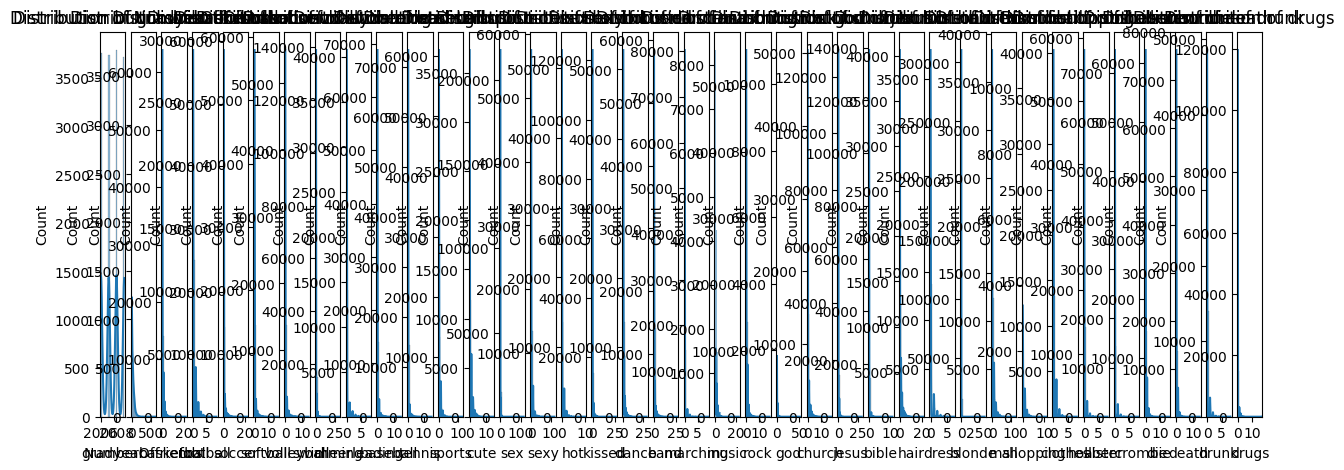

In [19]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.histplot(df_clustering[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

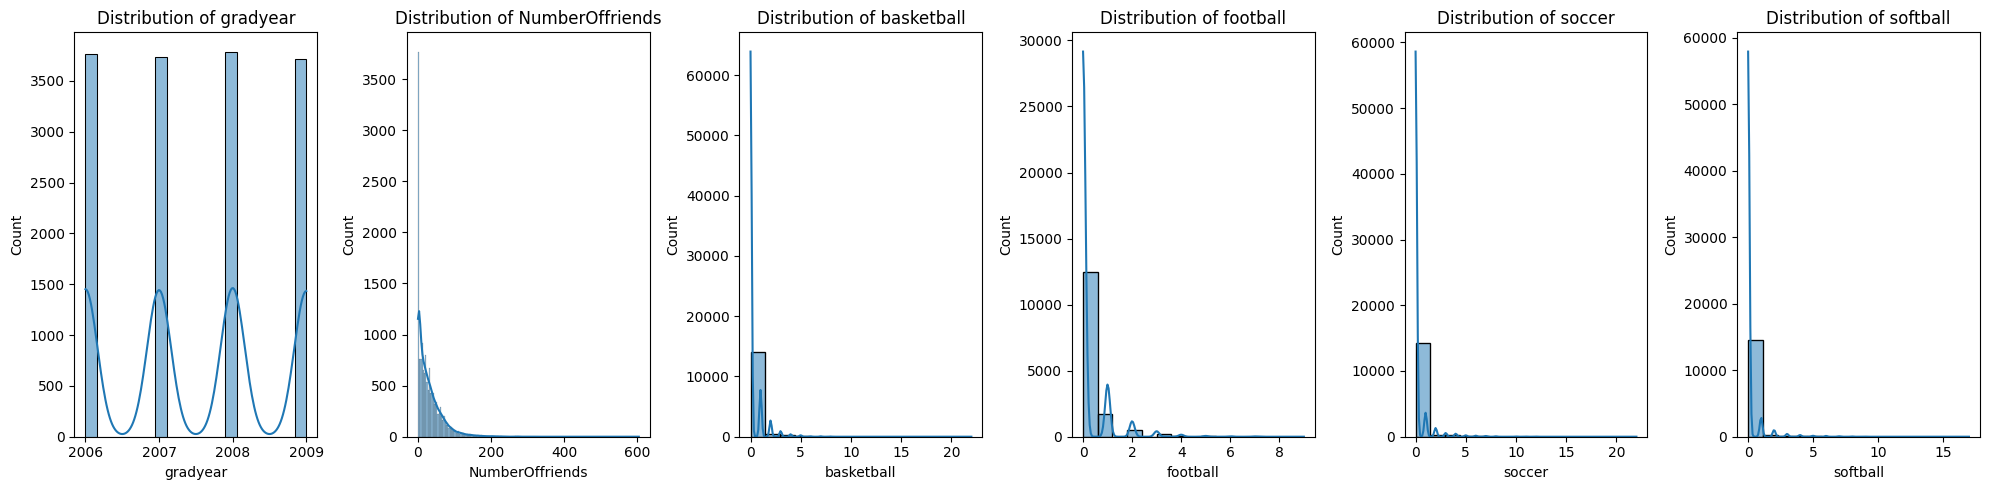

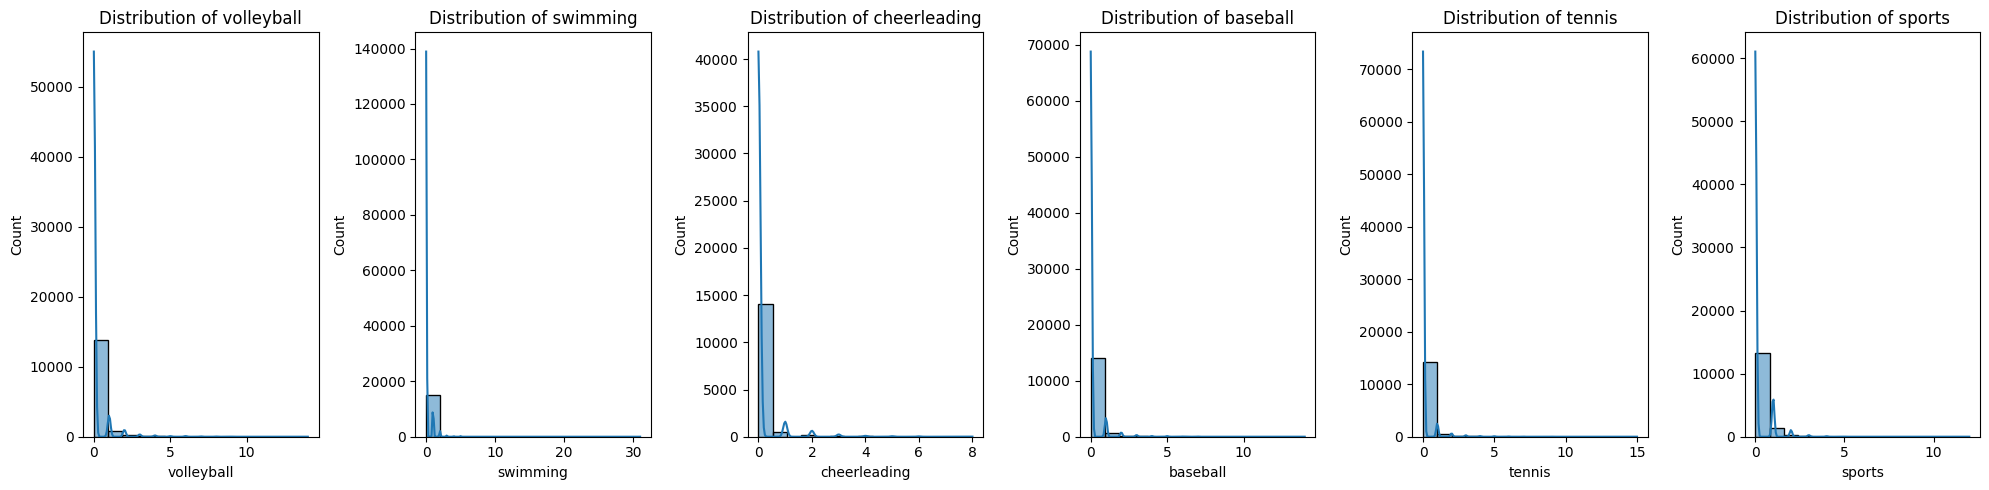

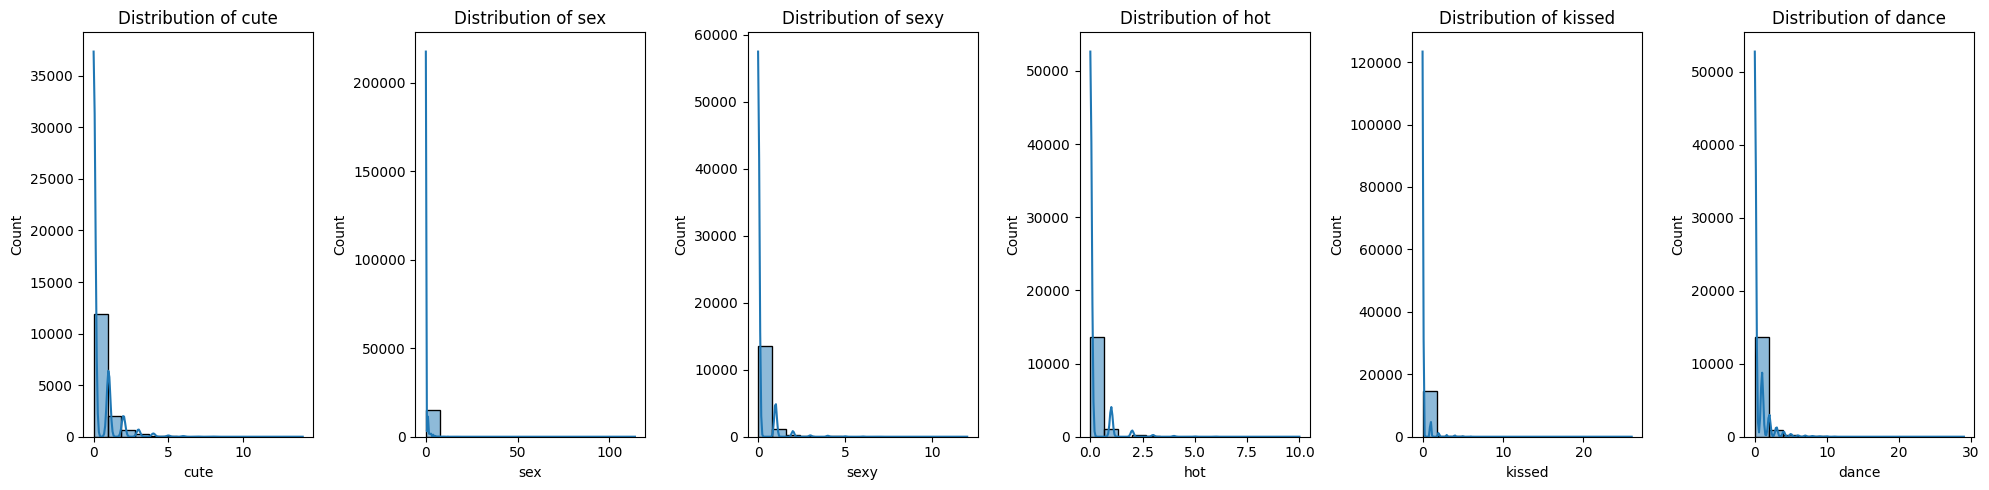

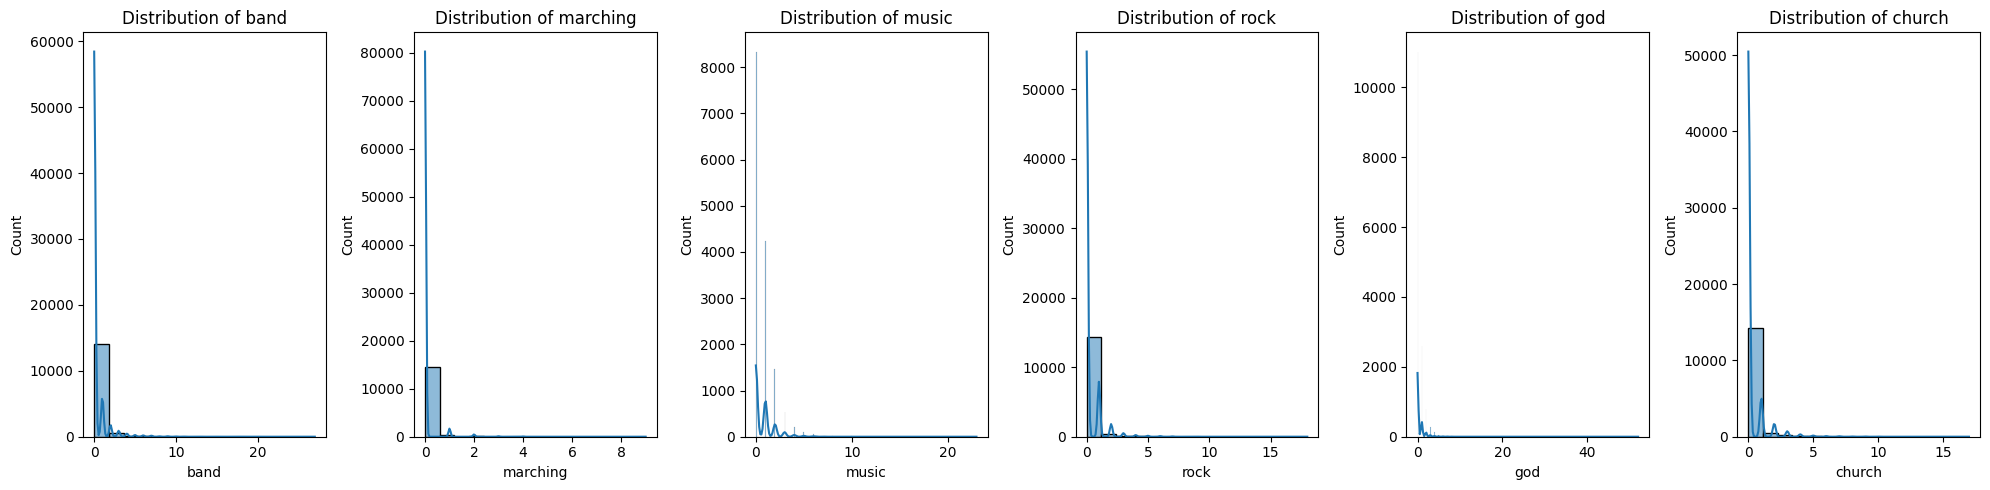

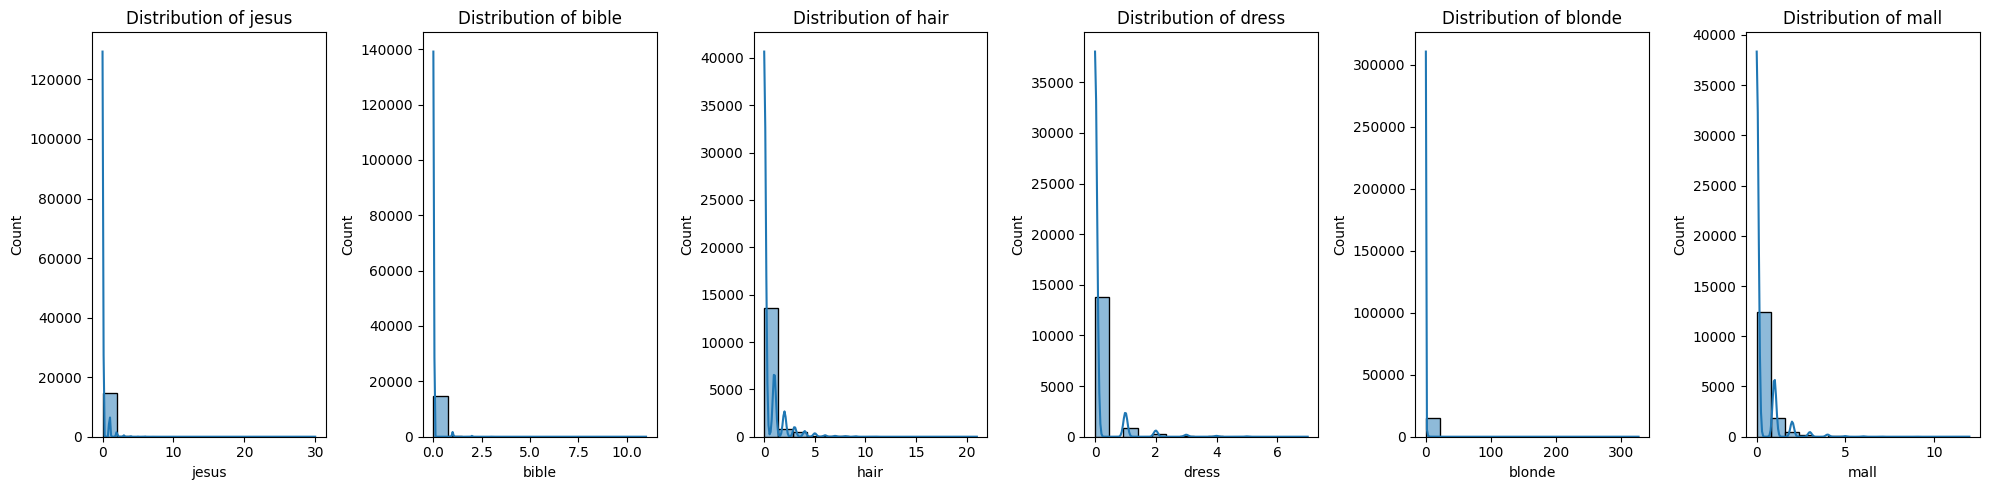

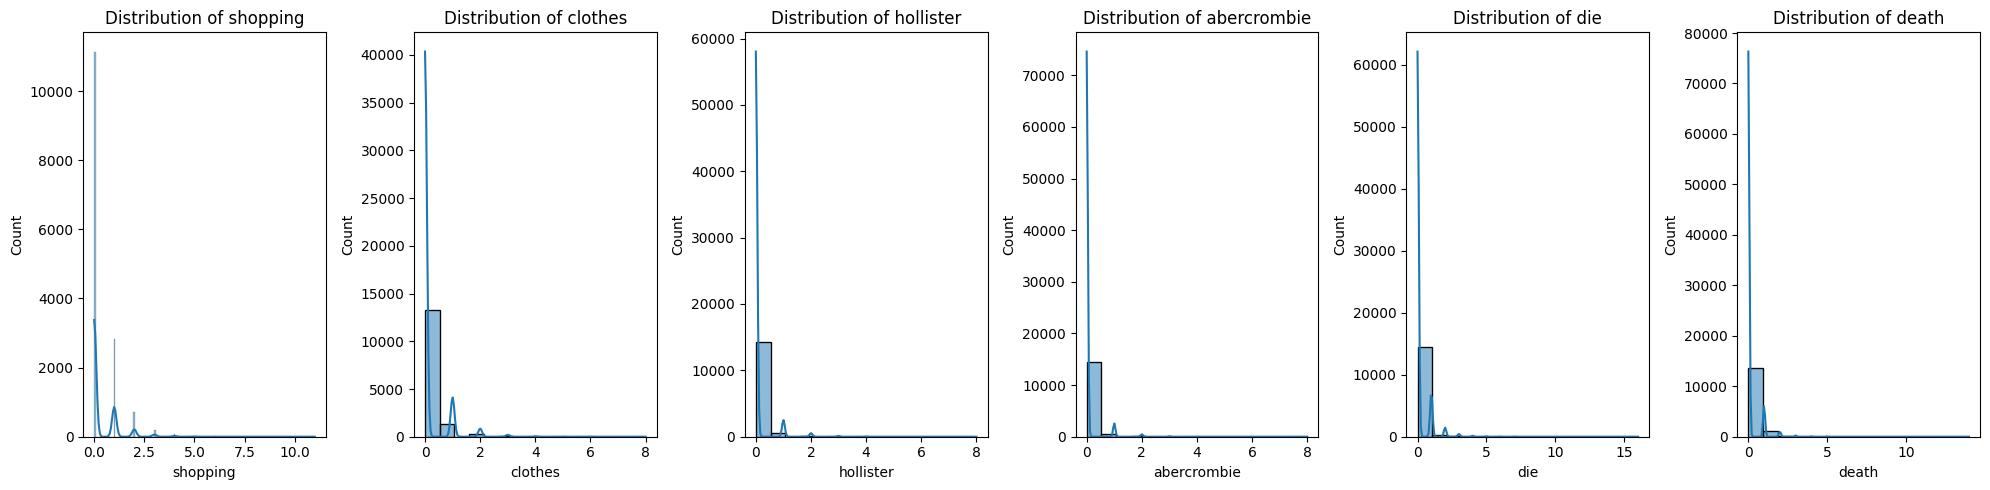

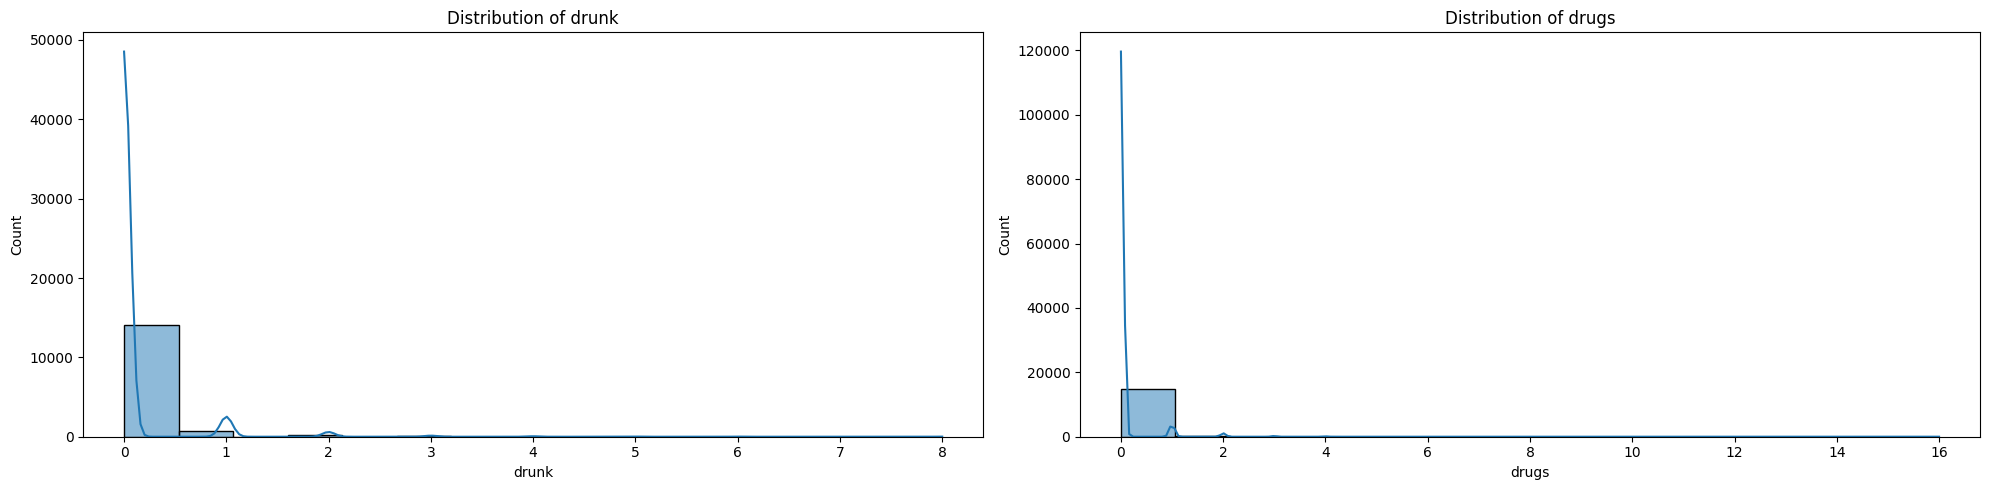

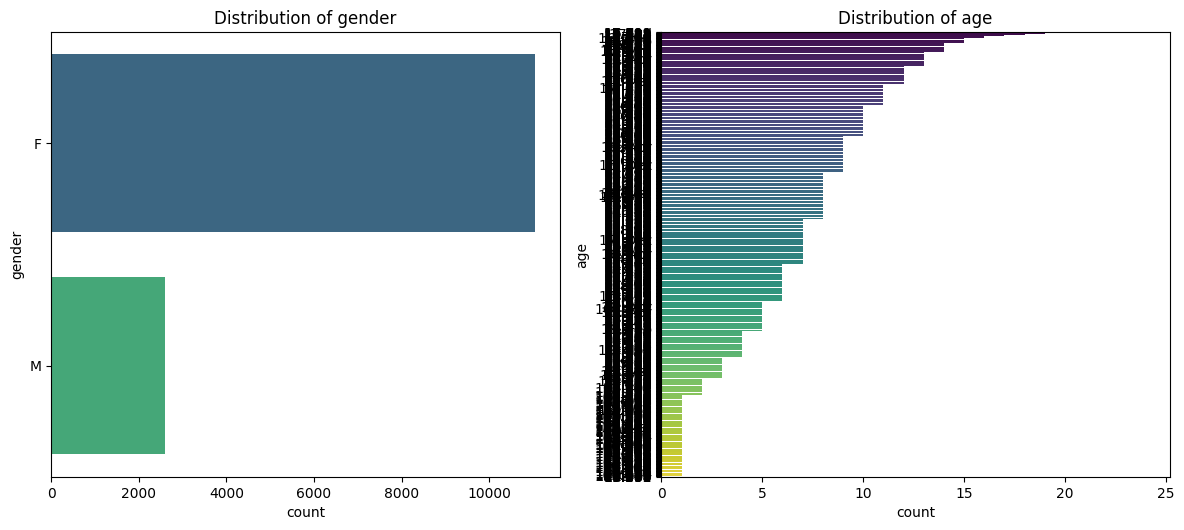

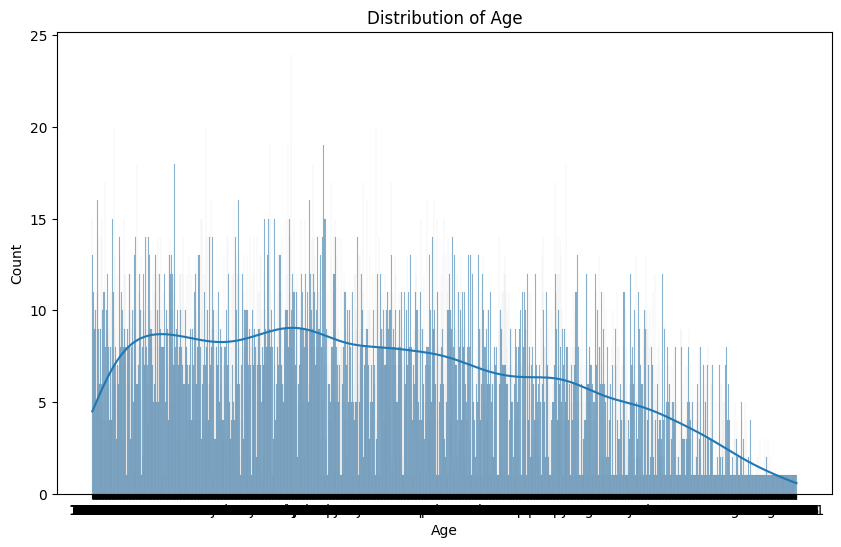

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clustering['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
print("\n--- Task 3: Distribution & Skewness Check ---")


--- Task 3: Distribution & Skewness Check ---


In [21]:
print("\nSkewness for numerical columns:")
for col in numerical_cols:
    skewness = df_clustering[col].skew()
    print(f"{col}: {skewness:.2f}")


Skewness for numerical columns:
gradyear: 0.00
NumberOffriends: 2.72
basketball: 5.68
football: 4.12
soccer: 7.28
softball: 7.84
volleyball: 7.55
swimming: 16.38
cheerleading: 6.92
baseball: 9.34
tennis: 11.24
sports: 5.88
cute: 4.16
sex: 49.97
sexy: 6.68
hot: 5.69
kissed: 12.87
dance: 5.73
band: 7.41
marching: 11.67
music: 4.38
rock: 6.45
god: 11.49
church: 5.55
jesus: 19.16
bible: 21.42
hair: 4.64
dress: 5.55
blonde: 117.25
mall: 4.70
shopping: 2.94
clothes: 4.57
hollister: 7.79
abercrombie: 8.17
die: 6.99
death: 8.10
drunk: 7.55
drugs: 12.51


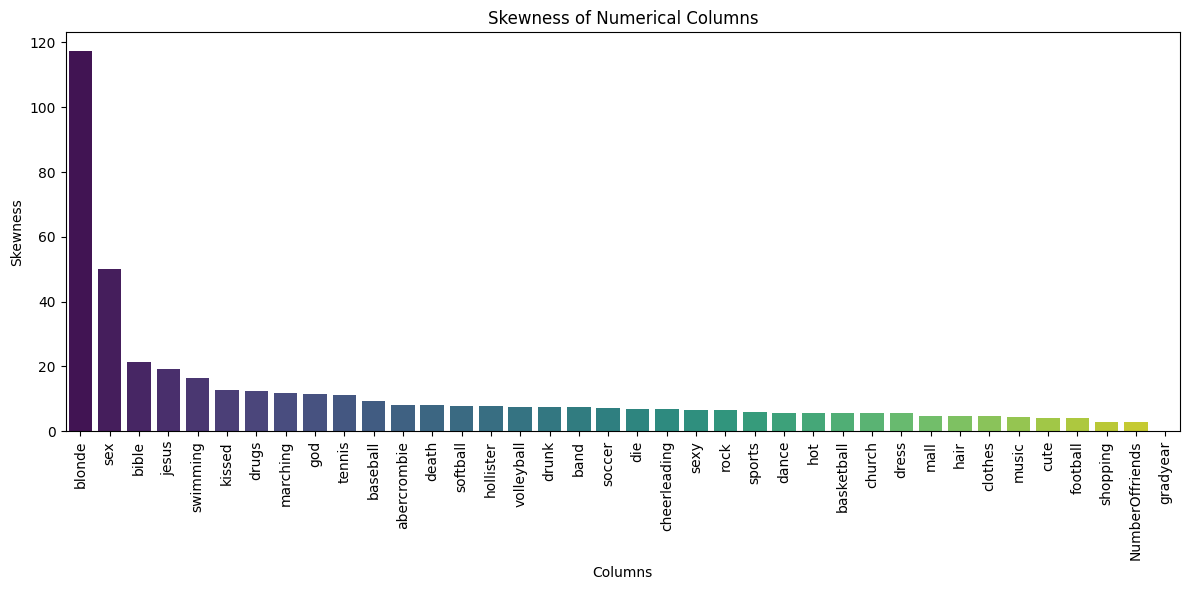

In [22]:
skewness_values = df_clustering[numerical_cols].skew().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=skewness_values.index, y=skewness_values.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Skewness of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.tight_layout()
plt.show()

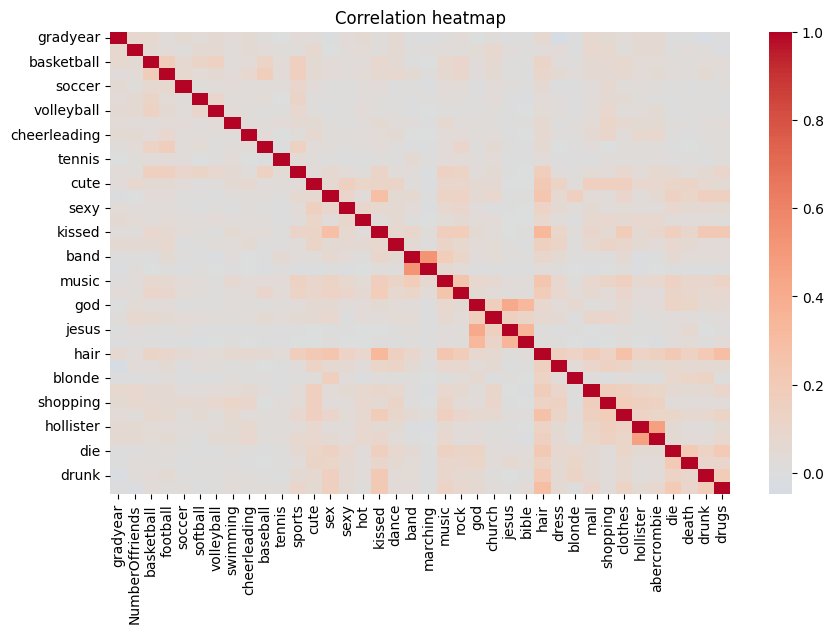

In [23]:
if len(numerical_cols) > 0:
    plt.figure(figsize=(10,6))
    sns.heatmap(df[numerical_cols].corr(numeric_only=True), cmap="coolwarm", center=0)
    plt.title("Correlation heatmap")
    plt.show()

In [ ]:
print("\n--- Task 4: Outlier Treatment & Feature Scaling ---")



--- Task 4: Outlier Treatment & Feature Scaling ---


In [24]:
print("\nMissing values before imputation:")
print(df_clustering.isnull().sum()[df_clustering.isnull().sum() > 0].sort_values(ascending=False))


Missing values before imputation:
age       2496
gender    1337
dtype: int64


In [30]:
for col in numerical_cols:
    if df_clustering[col].isnull().any():
        median_val = df_clustering[col].median()
        df_clustering[col].fillna(median_val, inplace=True)
        print(f"Imputed missing values in '{col}' with median: {median_val:.2f}")

In [32]:
for col in categorical_cols:
    if df_clustering[col].isnull().any():
        mode_val = df_clustering[col].mode()[0]
        df_clustering[col].fillna(mode_val, inplace=True)
        print(f"Imputed missing values in '{col}' with mode: {mode_val}")

In [33]:
print("\nMissing values after imputation:")
print(df_clustering.isnull().sum().sum())


Missing values after imputation:
0


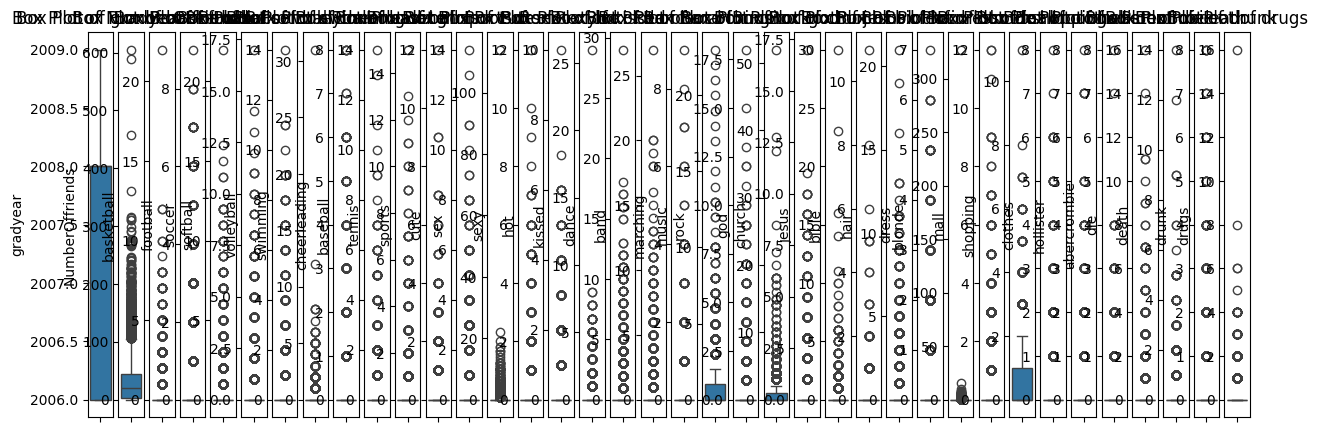

In [34]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(y=df_clustering[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

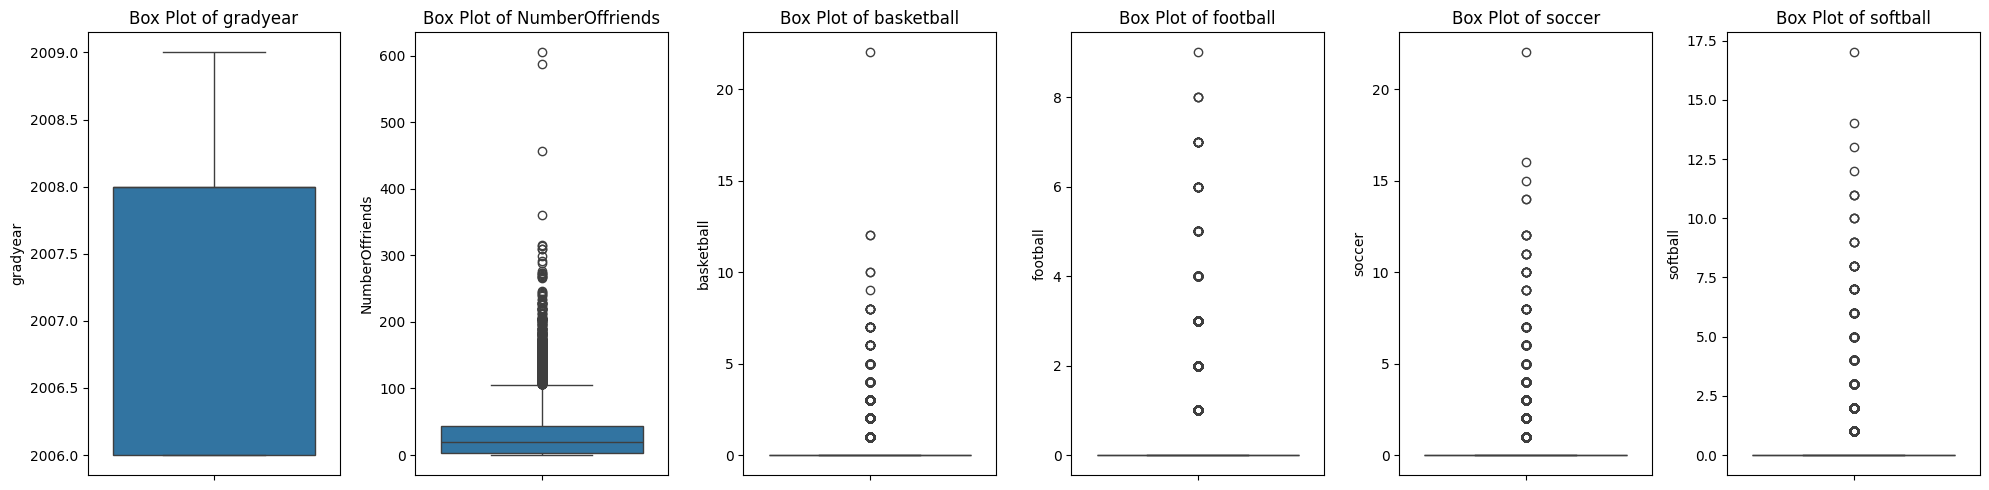

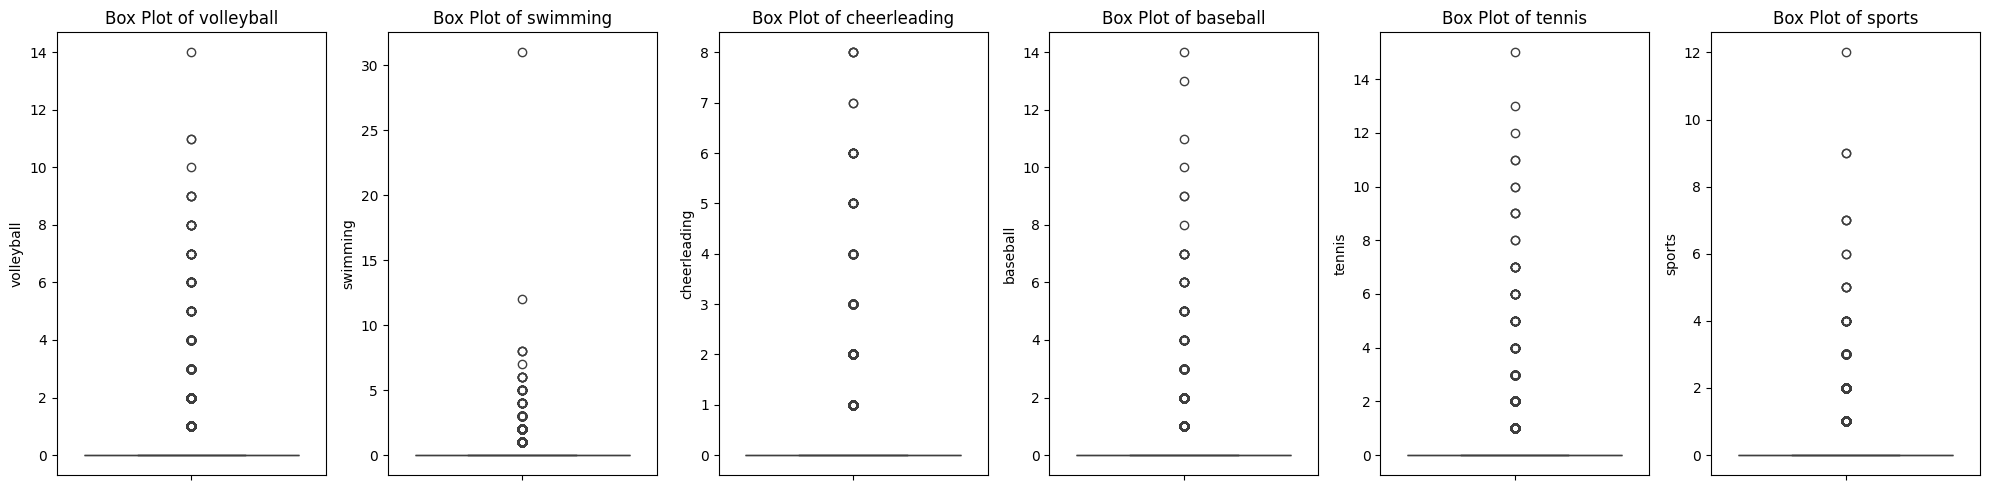

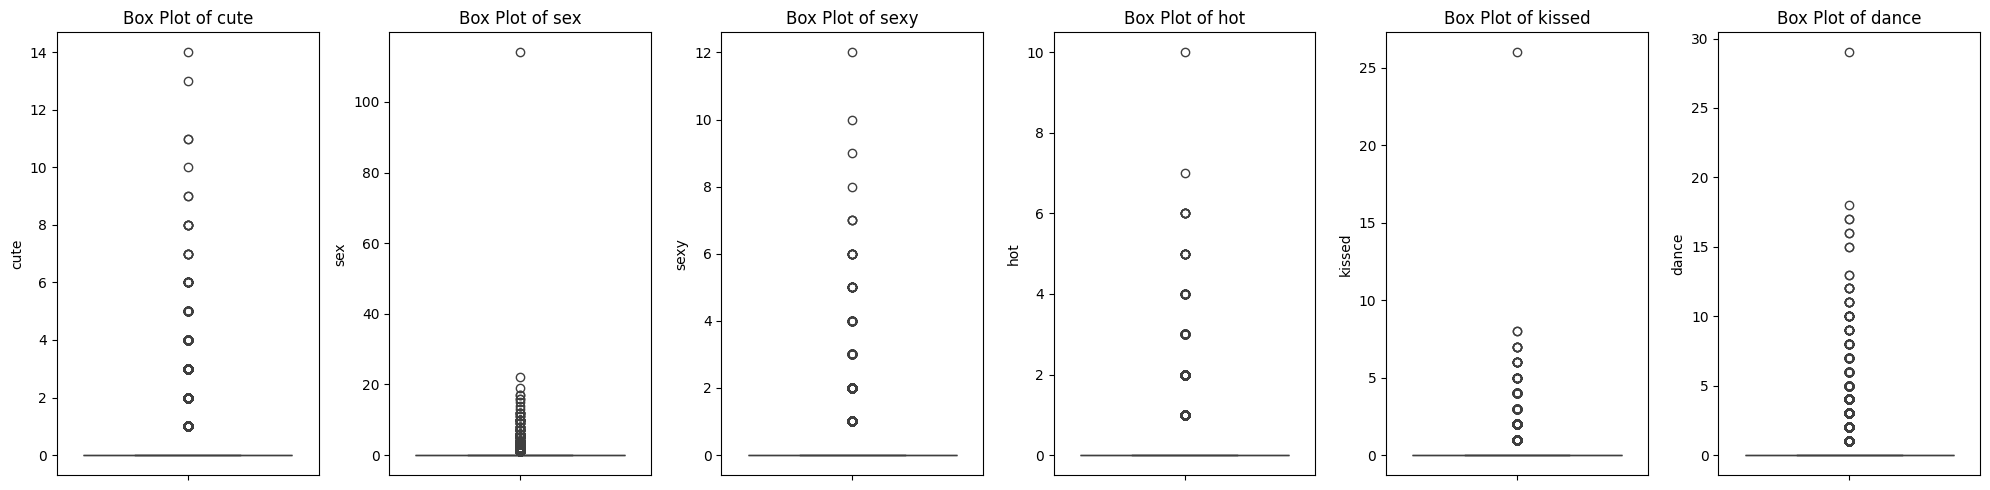

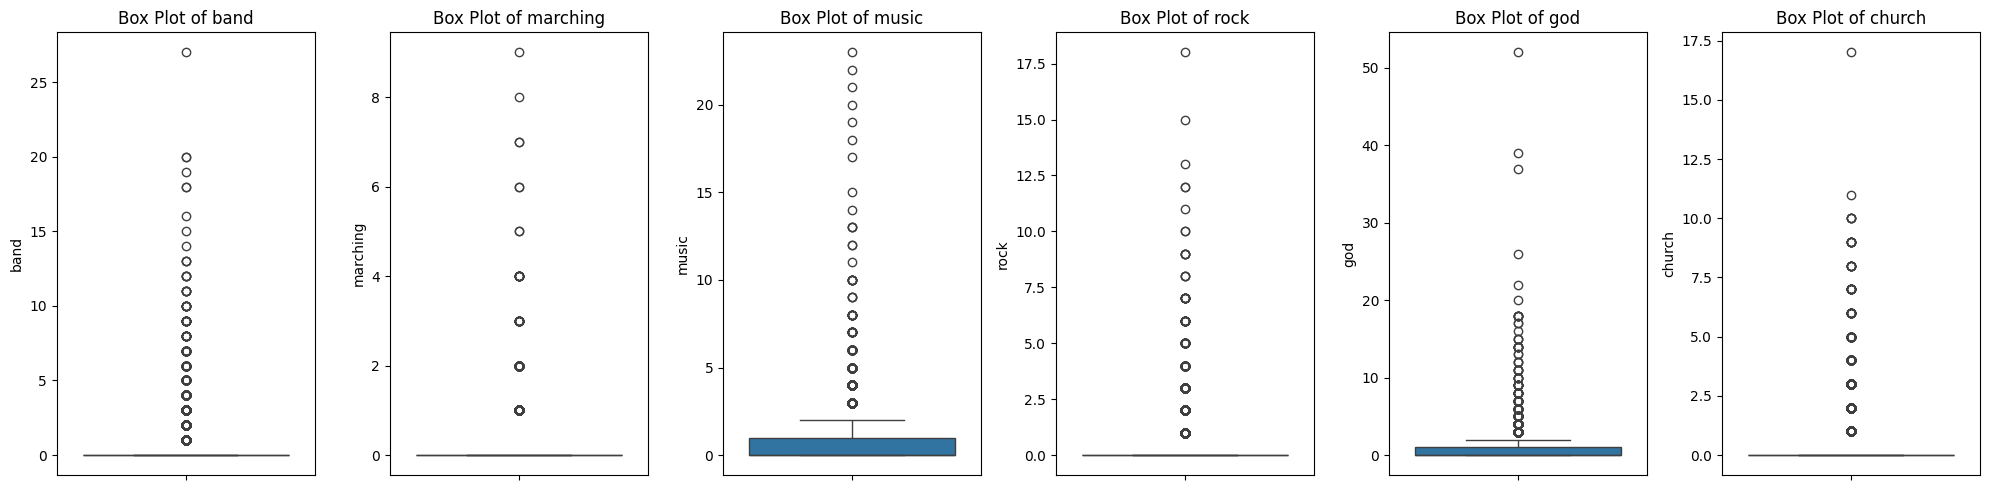

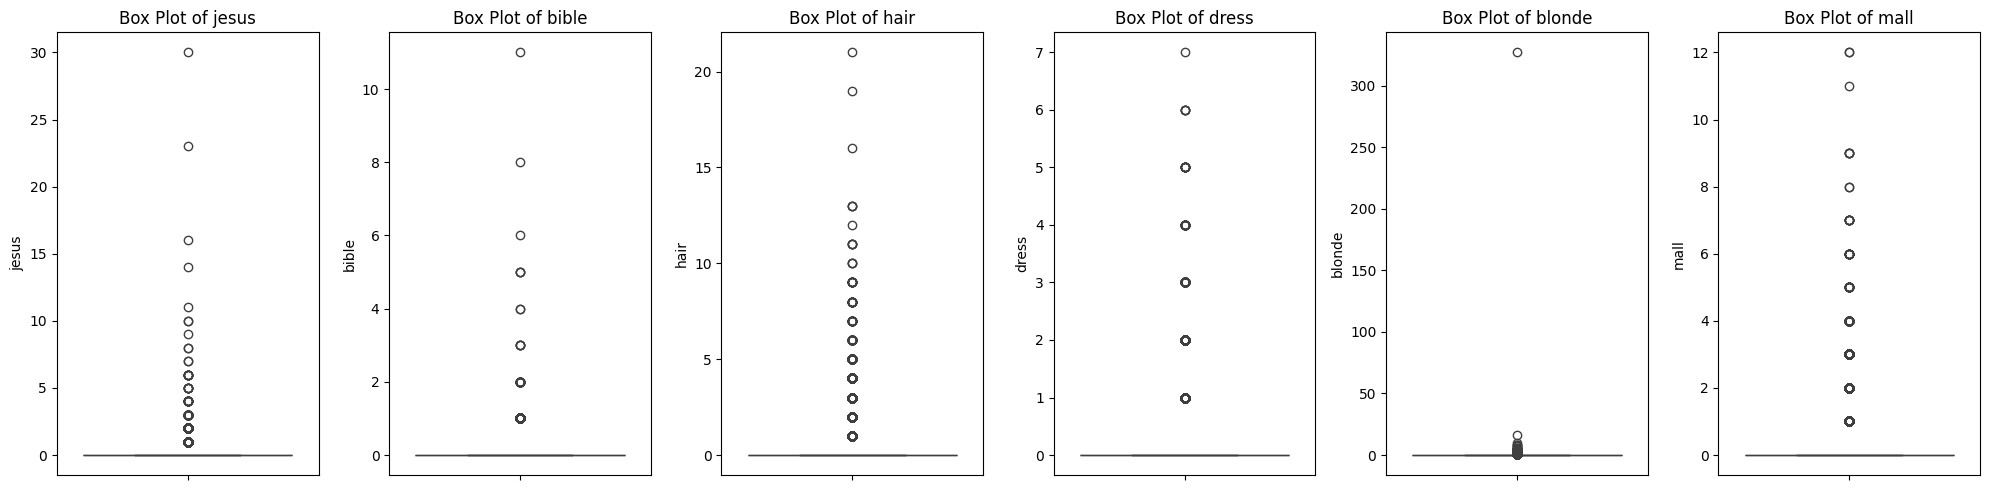

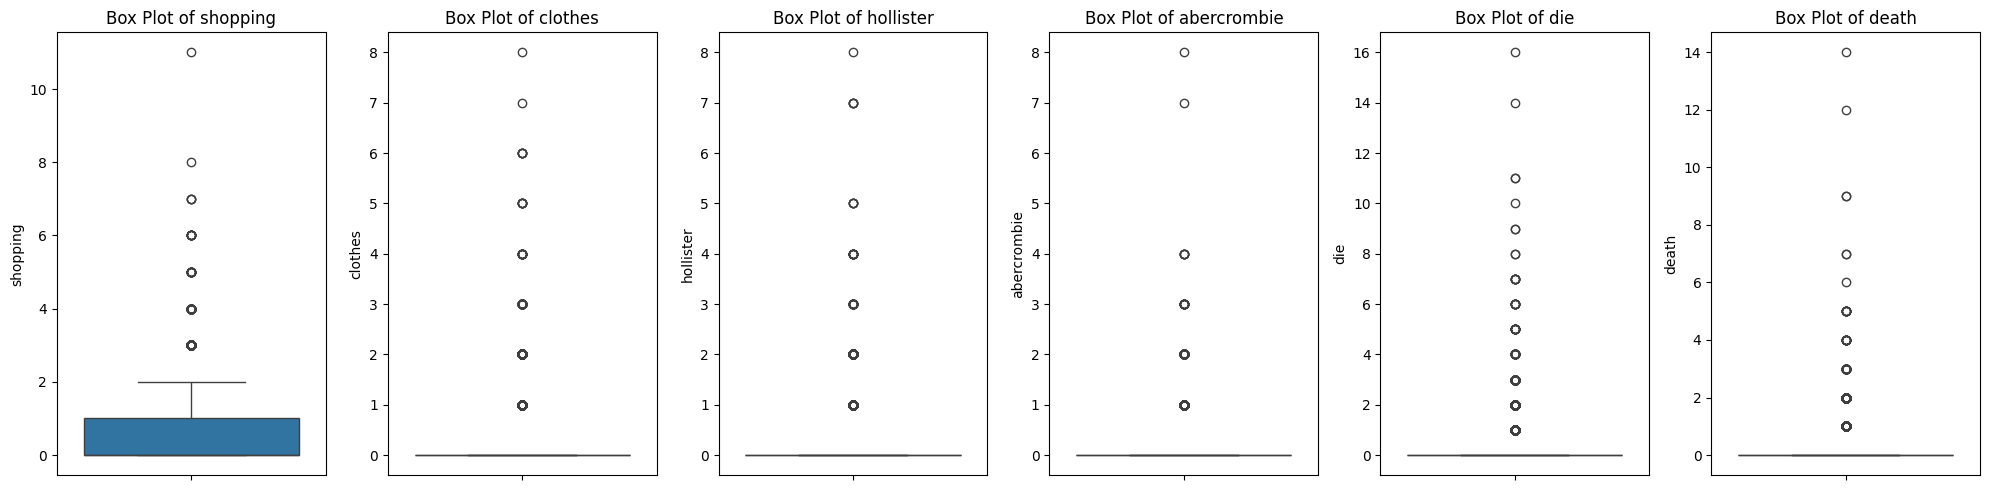

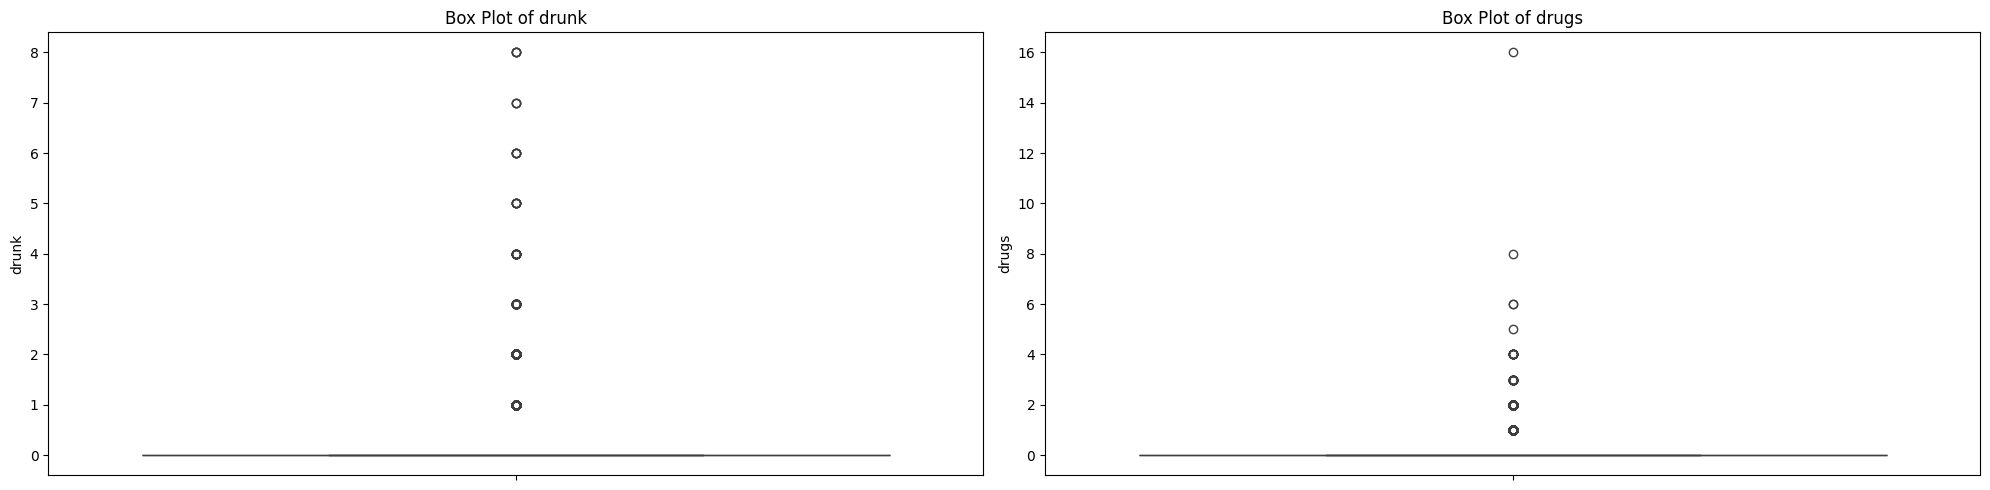


--- Columns with Potential Outliers (based on IQR) ---
- NumberOffriends
- basketball
- football
- soccer
- softball
- volleyball
- swimming
- cheerleading
- baseball
- tennis
- sports
- cute
- sex
- sexy
- hot
- kissed
- dance
- band
- marching
- music
- rock
- god
- church
- jesus
- bible
- hair
- dress
- blonde
- mall
- shopping
- clothes
- hollister
- abercrombie
- die
- death
- drunk
- drugs


We've identified that many columns have potential outliers. Handling outliers is an important consideration, especially for clustering algorithms that are sensitive to distance, like K-Means and Hierarchical Clustering.

Some common strategies as learnt in the class for handling outliers:

Removal: You could remove the rows containing extreme outliers. However, this can lead to loss of valuable data, especially if outliers are frequent.
Capping/Winsorizing: You can cap the outlier values at a certain percentile (e.g., the 95th or 99th percentile). This limits the influence of extreme values without removing data points.
Transformation: Applying transformations (like log or power transformations) can sometimes reduce the impact of outliers by changing the distribution of the data.
Using Robust Scalers: Scalers like RobustScaler are less affected by outliers than StandardScaler.
Using Clustering Algorithms Robust to Outliers: Some clustering algorithms, like DBSCAN, are less sensitive to outliers than K-Means or Agglomerative Clustering.
For this project, given that we plan to use StandardScaler (which helps with scale but not outliers directly) and explore different clustering methods, we will proceed without explicitly removing or capping outliers at this stage. The focus will be on seeing how the scaling and different clustering algorithms handle the data as is. This approach allows us to retain all data points for the clustering analysis.



In [ ]:
print("\n--- Task 5 & 6: Clustering Models & Evaluation ---")


--- Task 5 & 6: Clustering Models & Evaluation ---


In [49]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

In [50]:
print("Shape of processed data:", df_processed.shape)
print("\nFirst 5 rows of processed data:")
print(df_processed[:5])

Shape of processed data: (15000, 1946)

First 5 rows of processed data:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 200 stored elements and shape (5, 1946)>
  Coords	Values
  (0, 0)	-0.4450899820625174
  (0, 1)	-0.8431295139971041
  (0, 2)	-0.338478265038739
  (0, 3)	-0.3637898207462259
  (0, 4)	-0.24120234855060205
  (0, 5)	-0.21655020598711064
  (0, 6)	-0.22377902360459917
  (0, 7)	-0.24604835375905945
  (0, 8)	-0.2092313090014558
  (0, 9)	-0.20056958153935156
  (0, 10)	-0.16632016085136023
  (0, 11)	-0.30169832407046465
  (0, 12)	-0.40454640793157326
  (0, 13)	-0.16794967129568192
  (0, 14)	-0.26997847661058283
  (0, 15)	-0.2689122027466699
  (0, 16)	-0.19420688874874442
  (0, 17)	-0.3690645325126793
  (0, 18)	-0.2806968742628611
  (0, 19)	-0.14174331865967607
  (0, 20)	-0.6136233648736213
  (0, 21)	-0.3313008614471113
  (0, 22)	-0.35553460678305326
  (0, 23)	-0.30939786881016007
  (0, 24)	-0.1915686775167412
  :	:
  (4, 15)	-0.2689122027466699
  (4, 16)	-0.1942068

In [ ]:
### --- 5. Create a ML model to segment the students with similar interests, demographic profiling, and trend analysis over time. ---
# --- 6. Try out all the 3 clustering methods (K-Mean, Hierarchical, DBSCAN) and compare their silhouette scores. -

In [52]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

df_processed = preprocessor.fit_transform(df_clustering)

### Feature Scaling using StandardScaler

While `StandardScaler` doesn't directly handle outliers, it is a crucial step for distance-based clustering algorithms like K-Means and Hierarchical Clustering. It scales the data to have a mean of 0 and a standard deviation of 1, ensuring that all features contribute equally to the distance calculations.

We will use the `preprocessor` defined earlier, which includes `StandardScaler` for the numerical columns and `OneHotEncoder` for the categorical columns. The next step is to apply this preprocessor to our DataFrame.

Silhouette Score for K=2: 0.3785
Silhouette Score for K=3: 0.2669
Silhouette Score for K=4: 0.2615
Silhouette Score for K=5: 0.2642
Silhouette Score for K=6: 0.2232
Silhouette Score for K=7: 0.2304
Silhouette Score for K=8: 0.0098
Silhouette Score for K=9: 0.2110
Silhouette Score for K=10: 0.2027


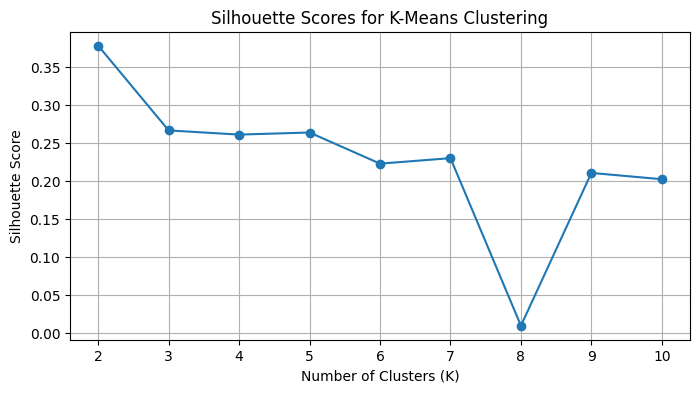

In [53]:
# Determine the optimal number of clusters using the Elbow Method or Silhouette Score
# For K-Means, let's try a range of cluster numbers and calculate silhouette scores

silhouette_scores = []
# Let's test for k from 2 to 10. You can adjust this range.
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_processed)
    score = silhouette_score(df_processed, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Silhouette Score for K={k}: {score:.4f}")

# Plotting the silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for K-Means Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [57]:
##Interpreting Silhouette Score and Plot
##The Silhouette Score is a metric used to evaluate the quality of clusters. It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score for a single data point ranges from -1 to +1.

##+1: Indicates that the data point is far away from neighboring clusters.
##0: Indicates that the data point is on or very close to the decision boundary between two neighboring clusters.
##-1: Indicates that the data point might be assigned to the wrong cluster.
##The silhouette plot shows the average silhouette score for different numbers of clusters (K). To interpret the plot:

##Look for the highest average silhouette score: The number of clusters with the highest average silhouette score is often considered a good choice for the number of clusters, as it suggests the clusters are relatively well-separated. In your plot, K=2 has the highest silhouette score.
##Consider the overall shape: While the highest point is important, also look at the overall trend. A steep drop after the highest point can also indicate a less optimal number of clusters.
##In your plot, the highest silhouette score is achieved at K=2 (approximately 0.3785). Scores between 0.25 and 0.5 generally indicate that the clusters are loosely separated